## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('./LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [21]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [3]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [22]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
区域      2760 non-null object
地址      2760 non-null object
标题      2760 non-null object
户型      2760 non-null object
面积      2760 non-null object
价格      2760 non-null int64
楼层      2760 non-null object
建造时间    2758 non-null object
朝向      2760 non-null object
更新时间    2760 non-null object
看房人数    2760 non-null int64
备注      2760 non-null object
链接地址    2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [23]:
lj_data.shape

(2760, 13)

In [25]:
lj_data.head(2)

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html


In [26]:
lj_data.describe()

,价格,看房人数
count,2760.000000,2760.000000
mean,7570.800725,13.448913
std,6316.204986,12.746202
min,1300.000000,0.000000
25%,4500.000000,4.000000
50%,6000.000000,10.000000
75%,8500.000000,19.000000
max,210000.000000,122.000000


### 找到最近更新信息的20套房子

In [28]:
lj_data.sort_values(by='update_time').tail(20)

KeyError: 'update_time'

### 平均看房人数

In [11]:
lj_data['view_num'].mean()

13.44891304347826

In [12]:
lj_data['view_num'].median()

10.0

### 房龄最小的20套房子的平均看房人数、平均面积...

In [22]:
import numpy as np

In [23]:
def get_age(x):
    try:
        return 2018-int(x[:4])
    except:
        return np.NaN

In [24]:
lj_data.loc[:,'age'] = lj_data['build_time'].apply(get_age)

In [16]:
lj_data.head(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37


In [18]:
def get_area(x):
    try:
        return int(x[:-2])
    except:
        return ''

In [19]:
lj_data.loc[:,'area_num'] = lj_data['area'].apply(get_area)

In [25]:
lj_data.nsmallest(columns='age', n=20)[['view_num', 'area_num']].mean()

view_num     11.55
area_num    104.05
dtype: float64

### 房子价格的分布(平均，方差，中位数)

In [26]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

In [28]:
print("房子价格的平均数为{}".format(lj_data['price'].mean()))

房子价格的平均数为7570.800724637681


### 最受欢迎的朝向(平均看房人数)

In [29]:
tmp_df = lj_data[['direction', 'view_num']].groupby('direction').mean()

In [31]:
tmp_df.reset_index(inplace=True)

In [32]:
tmp_df.head()

,direction,view_num
0,东,13.728395
1,东 东北,34.000000
2,东 东南,8.000000
3,东 东南 南,21.000000
4,东 北,19.454545


In [33]:
tmp_df.sort_values(by='view_num', ascending=False)

,direction,view_num
1,东 东北,34.000000
29,西 北,28.250000
34,西南 西,25.000000
3,东 东南 南,21.000000
30,西北,19.478261
4,东 北,19.454545
7,东 南 西,19.000000
24,南 西,16.461538
31,西南,16.439490
21,北,16.369369


### 房型数量分布

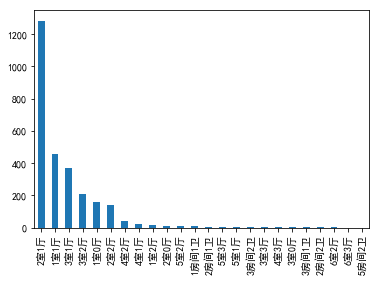

In [36]:
%matplotlib inline
lj_data['house_type'].value_counts().plot(kind='bar')

### 最受欢迎的房型

In [40]:
tmp = lj_data[['house_type','view_num']].groupby('house_type').agg('mean')

In [41]:
tmp.reset_index(inplace=True)
tmp.head()

,house_type,view_num
0,1室0厅,14.280255
1,1室1厅,15.398249
2,1室2厅,17.058824
3,1房间1卫,9.250000
4,2室0厅,15.777778


In [42]:
tmp.sort_values(by='view_num', ascending=False)

,house_type,view_num
23,6室3厅,21.000000
7,2房间1卫,19.833333
2,1室2厅,17.058824
13,3房间1卫,17.000000
8,2房间2卫,16.000000
4,2室0厅,15.777778
1,1室1厅,15.398249
0,1室0厅,14.280255
14,3房间2卫,14.250000
5,2室1厅,13.698598


### 房子的平均租房价格(按平米算)

In [43]:
lj_data.loc[:,'price_per_m2'] = lj_data['price']/lj_data['area_num']

In [45]:
lj_data['price_per_m2'].mean()

87.722684299004541

### 最受关注的小区

In [47]:
lj_data.head(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.0


In [48]:
tmp = lj_data[['address','view_num']].groupby('address').agg(sum)

In [49]:
tmp.reset_index(inplace=True)
tmp.head()

,address,view_num
0,10AM新坐标,43
1,11站,41
2,BOBO自由城,10
3,CBD总部公寓二期,9
4,DBC加州小镇,23


In [51]:
tmp.sort_values(by='view_num', ascending=False).head(1)

,address,view_num
951,清芷园,246


### 出租房源最多的小区

In [52]:
lj_data['address'].value_counts()

远洋山水          19
润枫水尚          10
金地仰山           9
天畅园            9
慧忠里            9
太阳公元           9
芍药居北里          9
大方居            9
后现代城           9
曙光里            8
鸿坤理想城礼域府       8
沿海赛洛城          8
裕中西里           8
安贞西里           8
鸿坤理想城大满贯       8
乐城             8
金隅万科城          7
京贸国际城西区        7
裕中东里           7
北京新天地          7
西潞苑小区          7
炫特嘉园二期         7
梵谷水郡           7
望京新城           7
阳光上东           6
苹果社区南区         6
碧水云天           6
西环里            6
椿树园            6
京畿道            6
              ..
政馨园三区          1
馨莲茗园           1
北苑6号院          1
枫丹丽舍           1
百万庄子区          1
莲怡园北路1号院       1
东方瑞景           1
玉阜嘉园           1
博客园            1
新外大街甲8号院       1
双清路14号院        1
天利园            1
长阳半岛怡和路3号院     1
华威西里           1
中景理想家          1
温泉花园A区         1
长丰园二区          1
樱花园二区          1
安贞苑50号院        1
建功北里           1
京棉新城           1
西坝河北里202号院     1
常青藤嘉园          1
中海九号公馆         1
保利嘉园一号院        1
百万庄大街甲21号院     1
融科橄榄城一期        1
鑫雅苑           

### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [53]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302


### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [54]:
lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x: "集中供暖" in x)

In [57]:
lj_data[['center_heating','price']].groupby('center_heating').agg('mean').reset_index()

,center_heating,price
0,False,7317.436975
1,True,7623.603327


### 哪个城区的租房价格最贵，平均价格是多少

### 不同房型的平均/最大/最小面积

In [58]:
lj_data[['house_type','price']].groupby('house_type').agg(['mean','max','min'])

price                
                     mean     max     min
house_type                               
1室0厅          4945.541401   23000    1900
1室1厅          5442.735230   16000    1300
1室2厅          7664.705882   15000    2500
1房间1卫         3862.500000    4200    3600
2室0厅          5497.777778    6600    2980
2室1厅          6314.758567   26000    1500
2室2厅          8988.028169   35000    2200
2房间1卫         5100.000000    7200    2800
2房间2卫         7050.000000   10500    3600
3室0厅          6900.000000    7700    6500
3室1厅          9591.644205   32000    2200
3室2厅         13697.584541   40000    2600
3室3厅          6966.666667    7600    6500
3房间1卫         8533.333333   13000    5900
3房间2卫         5950.000000    8500    5000
4室1厅         14847.619048   32000    3500
4室2厅         15723.809524   45000    3500
4室3厅         12333.333333   15000   11000
5室1厅          6125.000000    9000    5000
5室2厅         17375.000000   32000    7500
5室3厅         15040.000000   30000    4500
5房间2卫        16000.000000   16000   16000
6室2厅         16500.000000   17000   16000
6室3厅        210000.000000  210000  210000

### 哪个地铁口附近的房子最多

In [62]:
lj_data.head(4)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True


In [61]:
import re

def get_subway_info(string, pattern, n):
    result = re.search(pattern, string)
    if result:
        return result.group(n)
    return ''

In [75]:
lj_data.loc[:,'subway_line'] = lj_data['extra_info'].\
apply(lambda x:get_subway_info(x, pattern='距离(.+线(\\(.*?段\\))?)(.+站)', n=1))

In [76]:
lj_data.loc[:,'subway_station'] = lj_data['extra_info'].\
apply(lambda x:get_subway_info(x, pattern='距离(.+线(\\(.*?段\\))?)(.+站)', n=3))

In [77]:
lj_data['subway_station'].value_counts()

           1086
达官营站         43
双井站          34
安华桥站         32
青年路站         30
阜通站          28
十里堡站         28
北苑路北站        25
望京站          24
立水桥南站        22
东湖渠站         21
苏州街站         20
广渠门外站        19
广渠门内站        19
东直门站         19
朝阳公园站        19
劲松站          17
太阳宫站         17
三元桥站         17
安立路站         17
梨园站          16
大望路站         16
和平里北街站       16
昌平站          15
芍药居站         15
惠新西街北口站      15
潘家园站         15
车公庄西站        15
七里庄站         14
西直门站         14
           ... 
奥林匹克公园站       2
大井站           2
丰台东大街站        2
回龙观东大街站       2
育知路站          1
国家图书馆站        1
肖村站           1
天通苑南站         1
高碑店站          1
丰台科技园站        1
呼家楼站          1
大钟寺站          1
张自忠路站         1
广阳城站          1
虎坊桥站          1
国贸站           1
南楼梓庄站         1
复兴门站          1
农大南路站         1
欢乐谷景区站        1
南邵站           1
北海北站          1
木樨地站          1
北京站站          1
灯市口站          1
枣营站           1
郭公庄站          1
东单站           1
珠市口站          1
西北旺站          1
Name: subway_station, Le

### 地铁附近的房子平均价格 比 非地铁的高多少

In [78]:
lj_data.loc[:,'near_subway'] = lj_data['subway_station'].apply(lambda x:len(x)>1)

In [82]:
result = lj_data[['near_subway','price']].groupby('near_subway')\
.agg('mean').reset_index()

In [83]:
result

,near_subway,price
0,False,6106.436464
1,True,8520.800478


### 地铁附近的房源离地铁平均距离

In [84]:
lj_data.head(3)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2,center_heating,subway_line,subway_station,near_subway
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,False
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,14号线(东段),东湖渠站,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False,7号线,达官营站,True


In [86]:
lj_data.loc[:,'subway_station_distance'] = lj_data['extra_info']\
        .apply(lambda x:get_subway_info(x, pattern='.*站(.*?)米', n=1))

In [89]:
def distance_trans(x):
    try:
        return int(x)
    except:
        return np.NaN

In [90]:
lj_data.subway_station_distance = \
lj_data.subway_station_distance.apply(distance_trans)

In [92]:
lj_data['subway_station_distance'].mean()

717.55017921146953

### 最多的在租楼层

In [93]:
lj_data['floor'].apply(lambda x:x[0]).value_counts()

中    1026
高     932
低     798
地       4
Name: floor, dtype: int64

### 不同地区的房龄分布

### 直接看房的房子比例

In [94]:
lj_data.loc[:,'convenient'] = lj_data.extra_info.apply(lambda x:'随时看房' in x)

In [96]:
lj_data['convenient'].mean()

0.99855072463768113

### 有电梯和无电梯的房子数量

In [97]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,...,link,age,area_num,price_per_m2,center_heating,subway_line,subway_station,near_subway,subway_station_distance,convenient
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,...,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,False,NaN,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,...,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,14号线(东段),东湖渠站,True,731.0,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,...,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False,7号线,达官营站,True,684.0,True
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,...,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True,5号线,天通苑站,True,927.0,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,...,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302,True,10号线,团结湖站,True,88.0,True


### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

In [98]:
lj_data.loc[:,'floor_num'] = lj_data['floor'].\
apply(lambda x:get_subway_info(x, pattern='共(.*?)层', n=1))

In [100]:
def floor_trans(x):
    try:
        return int(x)
    except:
        return np.NaN
lj_data.loc[:,'floor_num'] = lj_data['floor_num'].apply(floor_trans)

In [101]:
lj_data.loc[:,'elevator'] = lj_data['floor_num'].apply(lambda x:x>6)

In [ ]:
lj_data[['elevator',...]].groupby().describe()

### 附加信息里主要有哪几类信息，覆盖多少百分比的房子

In [ ]:
# 分割附加信息，怎么合理分列（识别信息类别），然后就可以看覆盖百分比了。

In [102]:
lj_data.extra_info

0                           随时看房 精装修 集中供暖
1        距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
2              距离7号线达官营站684米 随时看房 精装修 自供暖
3             距离5号线天通苑站927米 随时看房 精装修 集中供暖
4             距离10号线团结湖站88米 随时看房 精装修 集中供暖
5                           随时看房 精装修 集中供暖
6                           随时看房 精装修 集中供暖
7            距离10号线牡丹园站580米 随时看房 精装修 集中供暖
8                           随时看房 精装修 集中供暖
9                               随时看房 集中供暖
10             距离5号线和平里北街站1198米 随时看房 集中供暖
11              距离10号线健德门站1056米 随时看房 集中供暖
12           距离9号线丰台南路站924米 随时看房 精装修 集中供暖
13             距离2号线朝阳门站94米 随时看房 精装修 集中供暖
14            距离10号线双井站498米 随时看房 精装修 集中供暖
15               距离10号线石榴庄站752米 随时看房 集中供暖
16           距离6号线慈寿寺站1166米 随时看房 精装修 集中供暖
17           距离6号线白石桥南站732米 随时看房 精装修 集中供暖
18          距离5号线北苑路北站1130米 随时看房 精装修 集中供暖
19                 距离6号线慈寿寺站667米 随时看房 自供暖
20                           随时看房 精装修 自供暖
21                          随时看房 精装修 集中供暖
22                          随时看房 精装修 集中供暖
23                距离2号线车公庄站773米 随时